In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-Aer

In [2]:
import numpy as np

In [3]:
# Packeges you must load
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [4]:
# The packeges you should load )()
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex

## Function for Plotting the quanutum Circuit

In [5]:
def qplot(x):
  return x.draw('mpl', style= 'iqx', initial_state = True, scale = 0.7)

## Function for Representing Quantum States in LaTeX Format

In [6]:
def latex(x):
  return Statevector(x).draw('latex')

***
***
***

In [7]:
# Create a quantumRegister
q = QuantumRegister(1)

In [8]:
# Create a ClassicalRegister
c = ClassicalRegister(1)

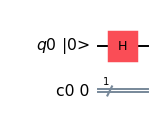

In [9]:
# Create the first Quantum Circuit with one qubit and one classical bit
qc1 = QuantumCircuit(q,c)
qc1.h(0)

qplot(qc1)

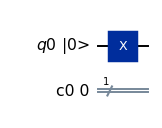

In [10]:
# Create the Second Quantum Circuit with one qubit and one classical bit
qc2 = QuantumCircuit(q,c)
qc2.x(0)

qplot(qc2)

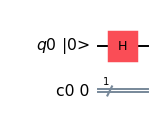

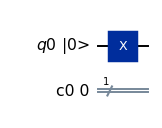

In [11]:
display(qplot(qc1), qplot(qc2))

## Representing the Quantum States:

In [12]:
ψ1 = Statevector(qc1)
ψ2 = Statevector(qc2)
latex(ψ1)

<IPython.core.display.Latex object>

In [13]:
latex(ψ2)

<IPython.core.display.Latex object>

## Representing the Density Matrix

In [14]:
from qiskit.quantum_info import DensityMatrix

In [15]:
ρ1 = DensityMatrix(qc1)
ρ1.draw('latex',prefix = '\\rho_1 = ')

<IPython.core.display.Latex object>

In [16]:
ρ2 = DensityMatrix(qc2)
ρ2.draw('latex',prefix = '\\rho_2 = ')

<IPython.core.display.Latex object>

## Representing in Bloch Sphere

In [17]:
from qiskit.visualization import plot_bloch_multivector

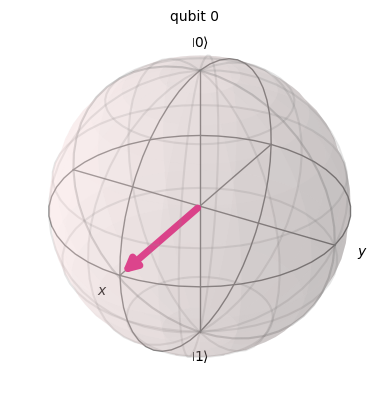

In [18]:
plot_bloch_multivector(qc1)

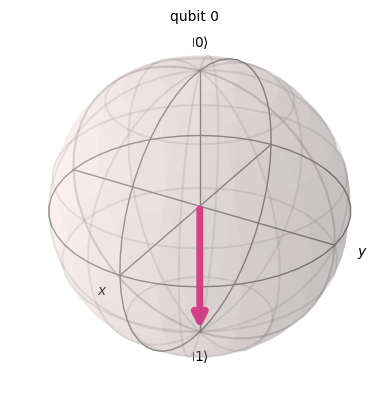

In [19]:
plot_bloch_multivector(qc2)

## Measrement of the Circuit

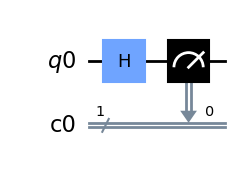

In [20]:
qc1.measure(q[0],c[0])
qc1.draw('mpl')

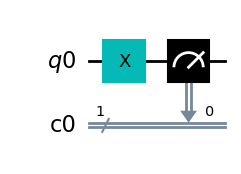

In [21]:
qc2.measure(q[0],c[0])
qc2.draw('mpl')

## Check the Purity

In [22]:
purity = ρ1.purity()
print(purity)

(0.9999999999999996+0j)


In [23]:
purity = ρ2.purity()
print(purity)

(1+0j)


## Check the Fidelity

In [24]:
from qiskit.quantum_info import state_fidelity

In [25]:
fidelity = state_fidelity(ψ1,ψ2)

In [26]:
fidelity

0.4999999999999999

In [27]:
print(state_fidelity(ρ1,ρ2))

0.4999999999999999


## Reduced Density Matrix

In [28]:
from qiskit.quantum_info import partial_trace

## Compile the quantum Circuit in a Fake quantum Simulator like Qasm Simulator
For Further information about the Qasm Simulator check the following video

https://www.youtube.com/watch?v=V4CwN4rEtVQ

In [29]:
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram

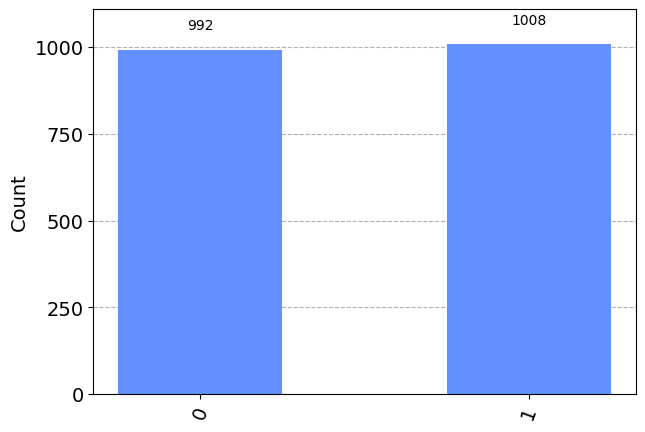

In [30]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc1, backend, shots = 2000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

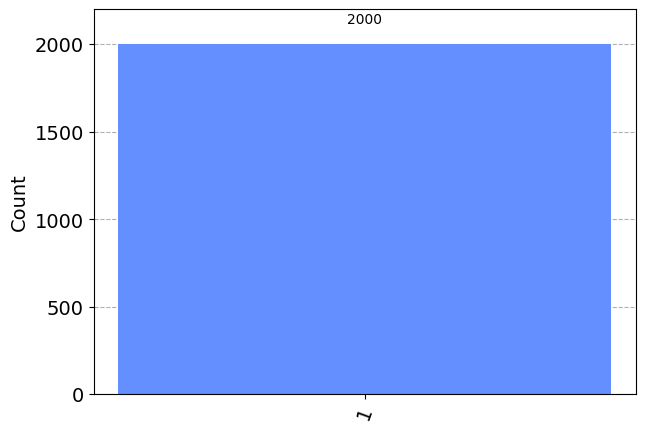

In [31]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc2, backend, shots = 2000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# Check For a two-qubit state

## 1st Example

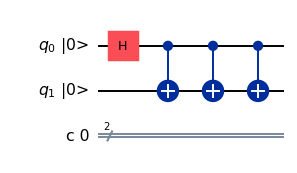

In [32]:
phi_plus = QuantumCircuit(2,2)
phi_plus.h(0)
phi_plus.cx(0,1)
phi_plus.cx(0,1)
phi_plus.cx(0,1)

qplot(phi_plus)

In [33]:
ψ_plus = Statevector(phi_plus)
ψ_plus.draw('latex', prefix = '|\\psi_+ \\rangle = ')

<IPython.core.display.Latex object>

In [34]:
ρ_plus = DensityMatrix(ψ_plus)
ρ_plus.draw('latex', prefix = '\\rho_+ = ')

<IPython.core.display.Latex object>

In [35]:
ρ_plus.purity()

(0.9999999999999996+0j)

In [36]:
ρA = partial_trace(ρ_plus,[0])
array_to_latex(ρA, prefix = '\\rho_A = ')

<IPython.core.display.Latex object>

In [37]:
ρB = partial_trace(ρ_plus,[1])
array_to_latex(ρB, prefix = '\\rho_B = ')

<IPython.core.display.Latex object>

In [38]:
ρA.purity()

(0.4999999999999998+0j)

In [39]:
ρB.purity()

(0.4999999999999998+0j)

## Second Example:

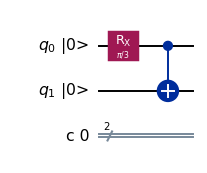

In [40]:
cirq = QuantumCircuit(2,2)
cirq.rx(np.pi/3, 0)
cirq.cx(0,1)

qplot(cirq)

In [41]:
ψ_cirq = Statevector(cirq)
ψ_cirq.draw('latex', prefix = '|\\psi_{cirq} \\rangle = ')

<IPython.core.display.Latex object>

In [42]:
ρ_cirq = DensityMatrix(ψ_cirq)
ρ_cirq.draw('latex', prefix = '\\rho_{cirq} = ')

<IPython.core.display.Latex object>

In [43]:
ρ_cirq.purity()

(1.0000000000000002+0j)

In [44]:
ρA = partial_trace(ρ_cirq,[0])
array_to_latex(ρA, prefix = '\\rho_A = ')

<IPython.core.display.Latex object>

In [45]:
ρB = partial_trace(ρ_cirq,[0])
array_to_latex(ρB, prefix = '\\rho_B = ')

<IPython.core.display.Latex object>

In [46]:
ρA.purity()

(0.6250000000000002+0j)

In [47]:
ρB.purity()

(0.6250000000000002+0j)

## Optional Question:
For a deeper understanding of the concepts covered, consider exploring an example involving a system with three or more qubits.